In [1]:
# 引入模块
# -*- coding:utf-8 -*-

# 常用包的函数
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# 解决显示汉字不正确问题
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

pd.set_option('precision', 6) #设置精度
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
pd.options.display.max_rows = 100

In [16]:
# boxplot箱线图
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


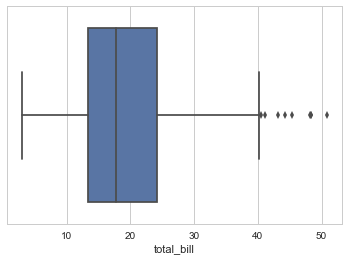

In [18]:
ax = sns.boxplot(x=tips["total_bill"])

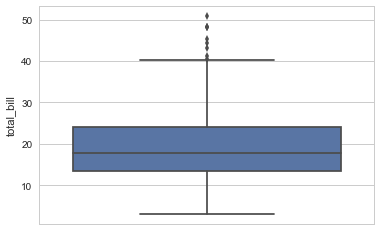

In [19]:
# 竖着放的箱线图，也就是将x换成y
ax = sns.boxplot(y=tips["total_bill"])

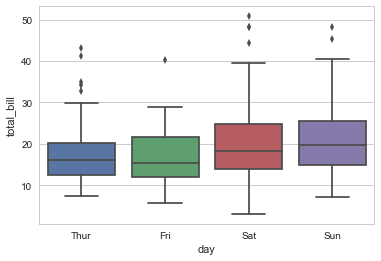

In [21]:
# 分组绘制箱线图，分组因子是day，在x轴不同位置绘制
ax = sns.boxplot(x="day", y="total_bill", data=tips)

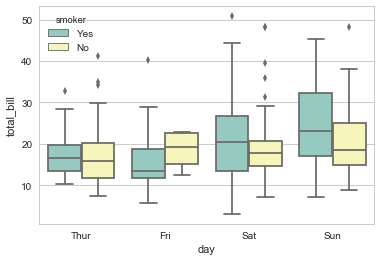

In [23]:
# 分组箱线图，分子因子是smoker，不同的因子用不同颜色区分
# 相当于分组之后又分组
ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")

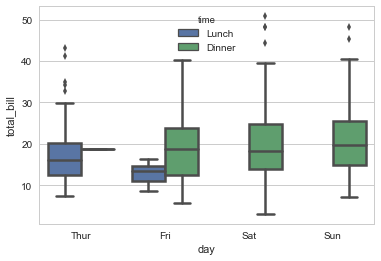

In [24]:
# 改变线宽，linewidth参数
ax = sns.boxplot(x="day", y="total_bill", hue="time",data=tips, linewidth=2.5)

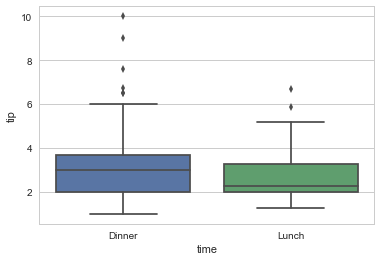

In [25]:
# 改变x轴顺序，order参数
ax = sns.boxplot(x="time", y="tip", data=tips, order=["Dinner", "Lunch"])

In [26]:
# 对dataframe的每个变量都绘制一个箱线图，水平放置
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


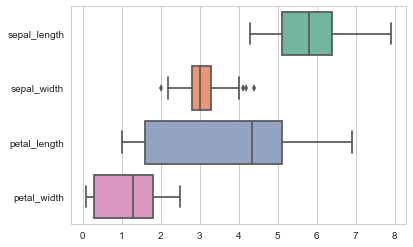

In [27]:
ax = sns.boxplot(data=iris, orient="h", palette="Set2")

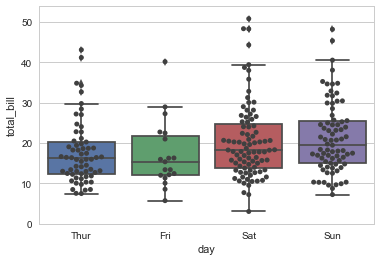

In [28]:
# 箱线图+有分布趋势的散点图–>的组合图
# 箱线图+有分布趋势的散点图
# 图形组合也就是两条绘图语句一起运行就可以了，相当于图形覆盖了
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

In [29]:
# violinplot小提琴图
# 小提琴图其实是箱线图与核密度图的结合，箱线图展示了分位数的位置，小提琴图则展示了任意位置的密度，
# 通过小提琴图可以知道哪些位置的密度较高。在图中，白点是中位数，黑色盒型的范围是下四分位点到上四分位点，
# 细黑线表示须。外部形状即为核密度估计（在概率论中用来估计未知的密度函数，属于非参数检验方法之一）。
sns.set_style("whitegrid")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


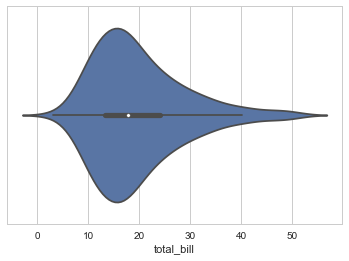

In [30]:
# 绘制小提琴图
ax = sns.violinplot(x=tips["total_bill"])

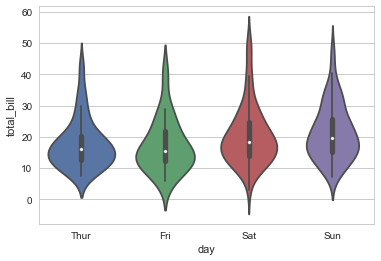

In [31]:
# 分组的小提琴图，同上面的箱线图一样通过X轴分组
ax = sns.violinplot(x="day", y="total_bill", data=tips)

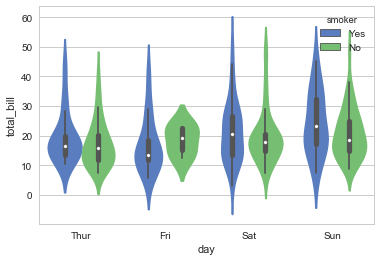

In [32]:
# 通过hue分组的小提琴图，相当于分组之后又分组
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                        data=tips, palette="muted")

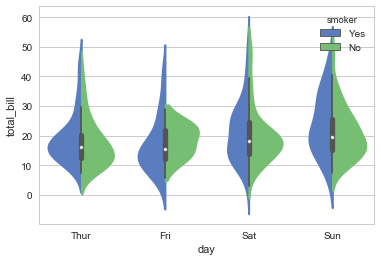

In [33]:
# 分组组合的小提琴图，其实就是hue分组后，各取一半组成一个小提琴图
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                        data=tips, palette="muted", split=True)

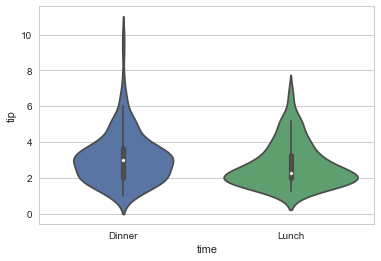

In [34]:
# 调整x轴顺序，同样通过order参数
ax = sns.violinplot(x="time", y="tip", data=tips,
                    order=["Dinner", "Lunch"])

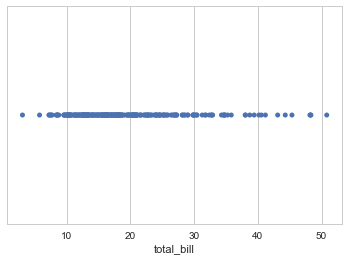

In [35]:
# 3.3.stripplot散点图
# 需要注意的是，seaborn中有两个散点图，一个是普通的散点图，另一个是可以看出分布密度的散点图。下面把它们花在一起就明白了。
# 普通的散点图
ax1 = sns.stripplot(x=tips["total_bill"])

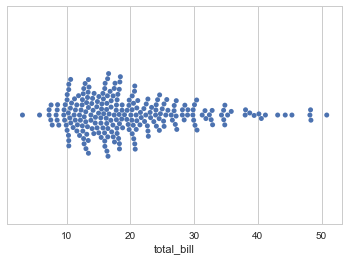

In [36]:
# 带分布密度的散点图
ax2 = sns.swarmplot(x=tips["total_bill"])

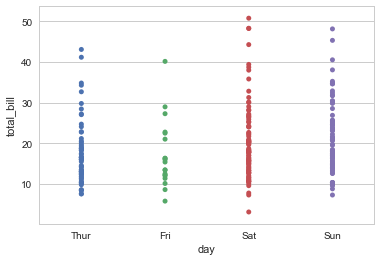

In [37]:
# 分组的散点图
ax = sns.stripplot(x="day", y="total_bill", data=tips)

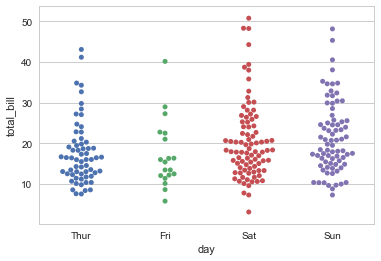

In [38]:
# 带分布密度的分组散点图
ax2 = sns.swarmplot(x="day", y="total_bill", data=tips)

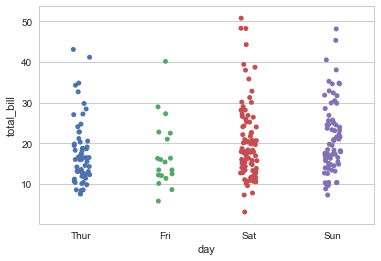

In [39]:
# 添加抖动项的散点图，jitter可以是0.1,0.2...这样的小数，表示抖动的程度大小
ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

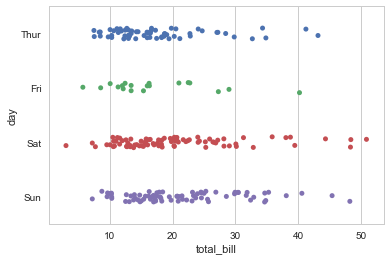

In [40]:
# 是不是想横着放呢，很简单的，x-y顺序换一下就好了
ax = sns.stripplot(x="total_bill", y="day", data=tips,jitter=True)

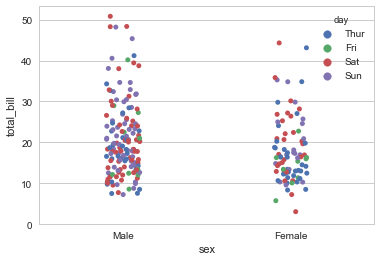

In [41]:
# 重点来了，分组绘制，而且是分组后分开绘制，在柱状图中，跟分组柱状图类似的。
# 通过 hue, split 参数控制
# 1.分组
ax = sns.stripplot(x="sex", y="total_bill", hue="day",
                    data=tips, jitter=True)

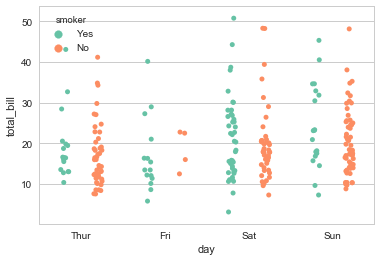

In [42]:
# 2.分开绘制
ax = sns.stripplot(x="day", y="total_bill", hue="smoker",
                data=tips, jitter=True,palette="Set2", split=True)

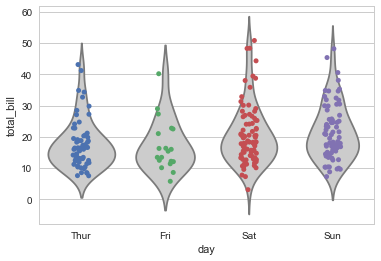

In [44]:
#  散点图+小提起图
# 两条命令一起运行就行了
ax = sns.violinplot(x="day", y="total_bill", data=tips,inner=None, color=".8")
ax = sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

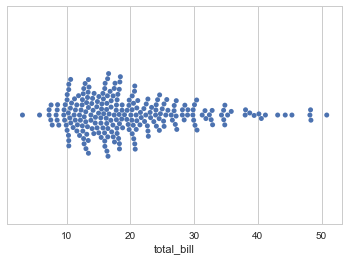

In [45]:
# 3.4.swarmplot带分布的散点图
# swarmplt的参数和用法和stripplot的用法是一样的，只是表现形式不一样而已
ax = sns.swarmplot(x=tips["total_bill"])

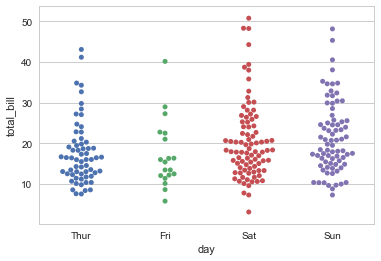

In [46]:
# 分组的散点图
ax = sns.swarmplot(x="day", y="total_bill", data=tips)

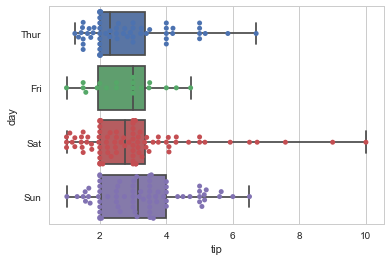

In [47]:
# 箱线图+散点图
# whis 参数设定是否显示箱线图的离群点，whis=np.inf 表示不显示
ax = sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
ax = sns.swarmplot(x="tip", y="day", data=tips)

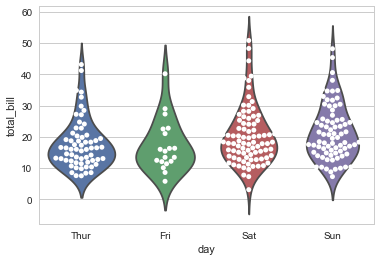

In [48]:
# 小提琴图+散点图
ax = sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
ax = sns.swarmplot(x="day", y="total_bill", data=tips,
                    color="white", edgecolor="gray")

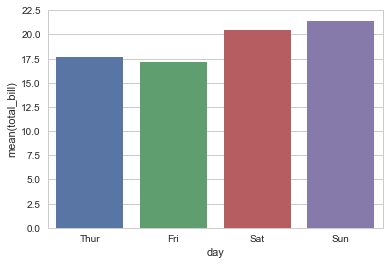

In [49]:
# 3.5.pointplot
# 直方图的统计函数，绘制的是变量的均值 estimator=np.mean
ax = sns.barplot(x="day", y="total_bill", data=tips,ci=0)

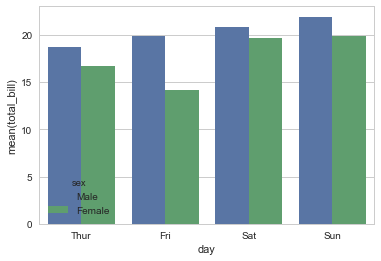

In [50]:
# 分组的柱状图
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips,ci=0)

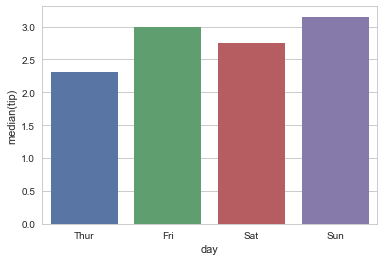

In [51]:
# 绘制变量中位数的直方图，estimator指定统计函数
from numpy import median
ax = sns.barplot(x="day", y="tip", data=tips, 
                    estimator=median, ci=0)

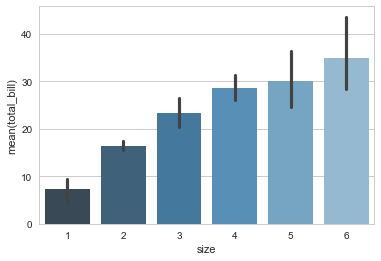

In [52]:
# 改变主题颜色
# palette="Blues_d"
ax = sns.barplot("size", y="total_bill", data=tips, 
                    palette="Blues_d")

In [55]:
# 3.7.countplot计数统计图
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


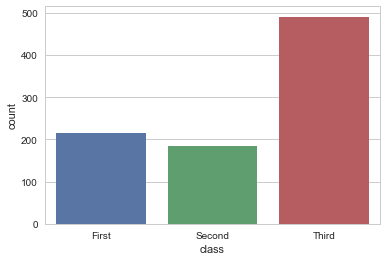

In [56]:
ax = sns.countplot(x="class", data=titanic)

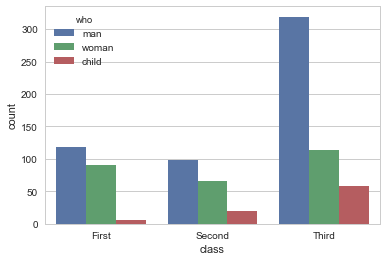

In [57]:
# 分组绘图
ax = sns.countplot(x="class", hue="who", data=titanic)

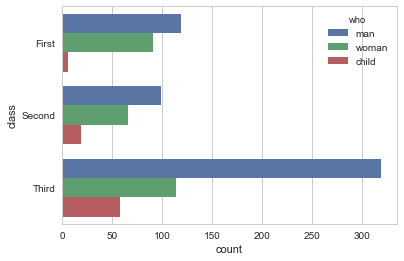

In [58]:
# 如果是横着放，x用y替代
ax = sns.countplot(y="class", hue="who", data=titanic)

In [59]:
# 3.8.factorplot
# 绘制 因子变量-数值变量 的分布情况图。
exercise = sns.load_dataset("exercise")
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


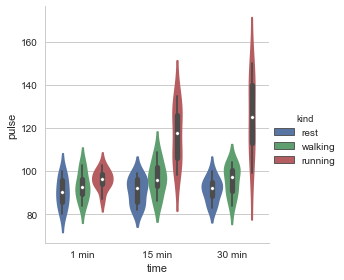

In [60]:
g = sns.factorplot(x="time", y="pulse", hue="kind",
                    data=exercise, kind="violin")

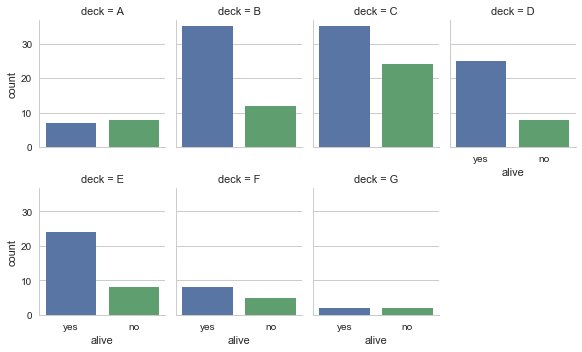

In [61]:
# 不同的deck（因子）绘制不同的alive（数值），col为分子图绘制，col_wrap每行画4个子图
titanic = sns.load_dataset("titanic")
g = sns.factorplot(x="alive", col="deck", col_wrap=4,
                    data=titanic[titanic.deck.notnull()],
                    kind="count", size=2.5, aspect=.8)

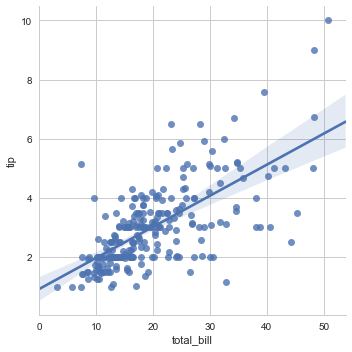

In [63]:
# 4.回归图
# 回归图有两个，我暂时没有看出他们有什么区别，从函数说明来看看吧。 
# lmplot： Plot data and regression model fits across a FacetGrid. 
# regplot：Plot data and a linear regression model fit.
# 线性回归图
g = sns.lmplot(x="total_bill", y="tip", data=tips)

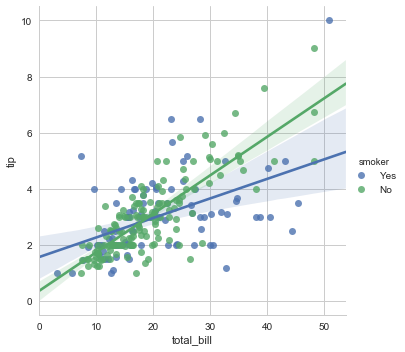

In [64]:
# 分组的线性回归图，通过hue参数控制
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

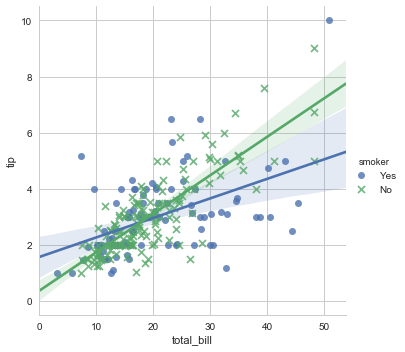

In [65]:
# 分组绘图，不同的组用不同的形状标记
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", 
                data=tips,markers=["o", "x"])

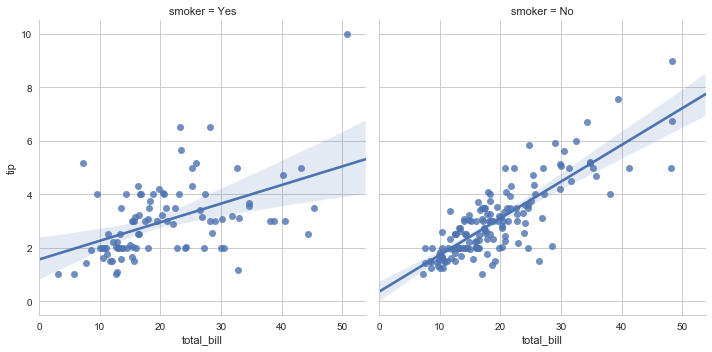

In [66]:
# 不仅分组，还分开不同的子图绘制，用col参数控制
g = sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips)

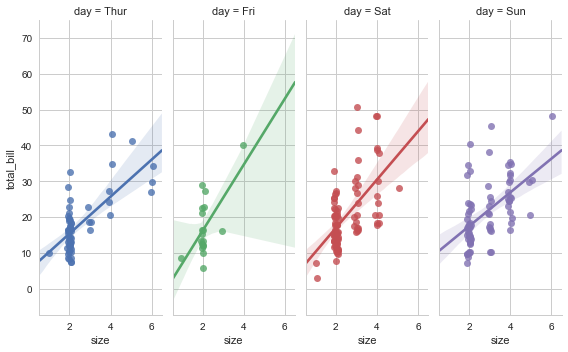

In [67]:
# col+hue 双分组参数，既分组，又分子图绘制，jitter控制散点抖动程度
g = sns.lmplot(x="size", y="total_bill", hue="day", 
                col="day",data=tips, aspect=.4, x_jitter=.1)# 分组绘制，控制size尺寸

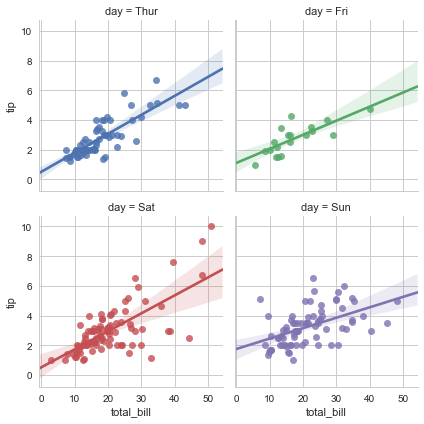

In [68]:
# 分组绘制，控制size尺寸
g = sns.lmplot(x="total_bill", y="tip", col="day", hue="day",
                data=tips, col_wrap=2, size=3)

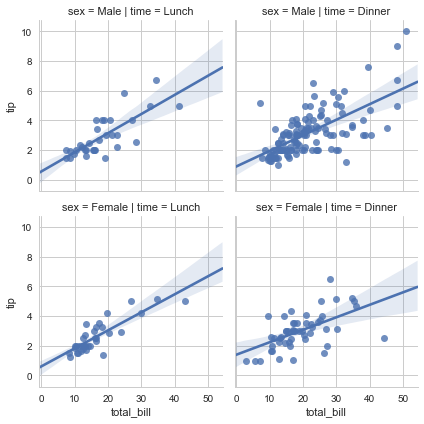

In [69]:
# 既然col可以控制分组子图的，那么row也是可以控制分组子图的
g = sns.lmplot(x="total_bill", y="tip", row="sex", 
                col="time", data=tips, size=3)

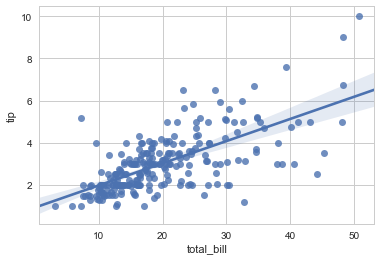

In [70]:
# 4.2.回归图regplot
# Plot the relationship between two variables in a DataFrame:
ax = sns.regplot(x="total_bill", y="tip", data=tips)

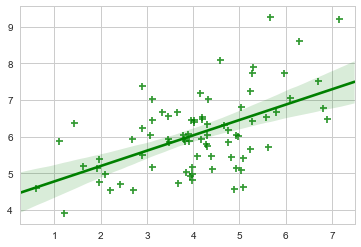

In [74]:
# 控制散点的形状和颜色
import numpy as np; np.random.seed(8)
mean, cov = [4, 6], [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, cov, 80).T
ax = sns.regplot(x=x, y=y, color="g", marker="+")

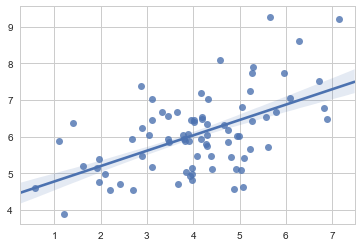

In [75]:
# 控制回归的置信度，你会看到拟合直线的外面的面积的有变化的
ax = sns.regplot(x=x, y=y, ci=68)

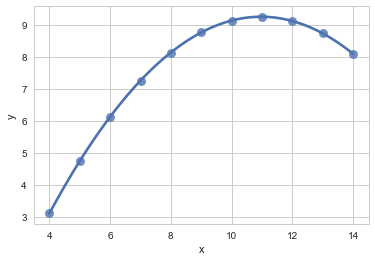

In [78]:
# 上面的都是拟合一次曲线，拟合二次曲线通过order=2设置，
# 拟合一次曲线相当于 order=1
ans = sns.load_dataset("anscombe")
ax = sns.regplot(x="x", y="y", data=ans.loc[ans.dataset == "II"],
                scatter_kws={"s": 80},order=2, ci=None, truncate=True)

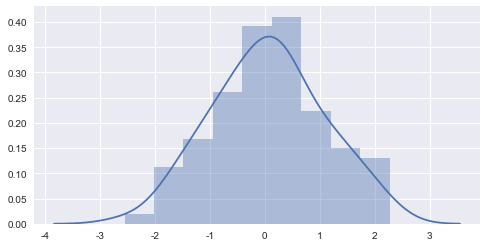

In [81]:
# 5.数值分布绘图
# 5.1.直方图histplot
# 绘制数值变量的密度分布图
# 默认既绘制核密度曲线，也绘制直方图
import seaborn as sns, numpy as np
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

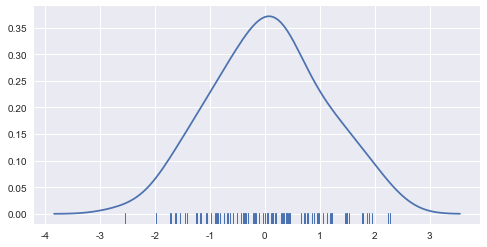

In [82]:
# 只绘制核密度曲线，不绘制直返图
ax = sns.distplot(x, rug=True, hist=False)# 横着放

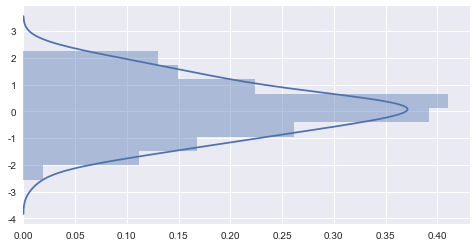

In [83]:
# 横着放
ax = sns.distplot(x, vertical=True)

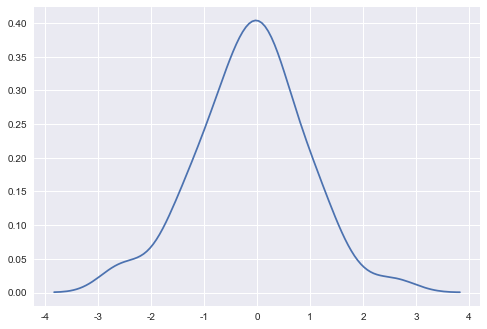

In [84]:
# 5.2.核密度图kdeplot
# 绘制核密度图
import numpy as np; np.random.seed(10)
import seaborn as sns; sns.set(color_codes=True)
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x)

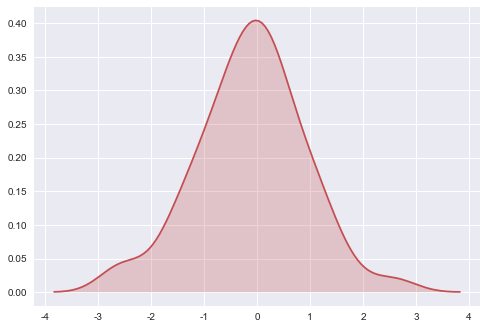

In [85]:
# shade参数决定是否填充曲线下面积
ax = sns.kdeplot(x, shade=True, color="r")

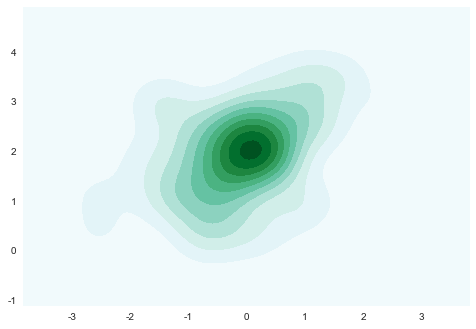

In [86]:
# 双变量密度图，相当于等高线图了
# shade 参数改用颜色深浅表示密度的大小，不过不用，就真的是等高线了
ax = sns.kdeplot(x, y, shade=True)

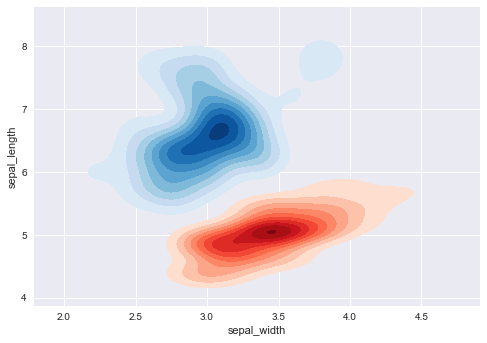

In [87]:
# 分组绘制双变量的核密度图
# 相当于绘制两个核密度图，通过图可以看到密度中心
# 类似于挖掘算法中聚类中心绘图
iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]  # 组1
virginica = iris.loc[iris.species == "virginica"]  # 组2

ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length, 
                    cmap="Reds", shade=True, shade_lowest=False)

ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length, 
                    cmap="Blues", shade=True, shade_lowest=False)

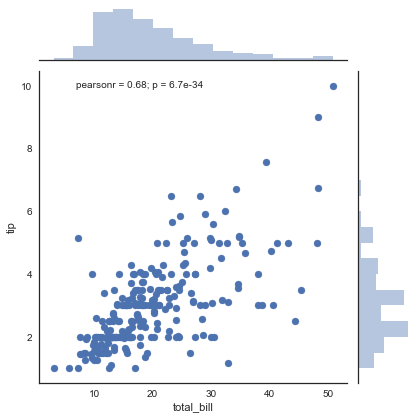

In [88]:
# 5.3.双变量关系图jointplot
# joint，顾名思义，就是联合呀。 
# Draw a plot of two variables with bivariate and univariate graphs.

# kind参数可以使用不同的图形反应两变量的关系，比如点图，线图，核密度图。
# 默认绘制双变量的散点图，计算两个变量的直方图，计算两个变量的相关系数和置信度
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips)

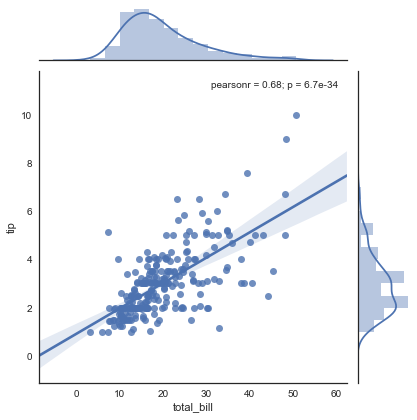

In [90]:
# 通过kind参数，除了绘制散点图，还要绘制拟合的直线，拟合的核密度图
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg")

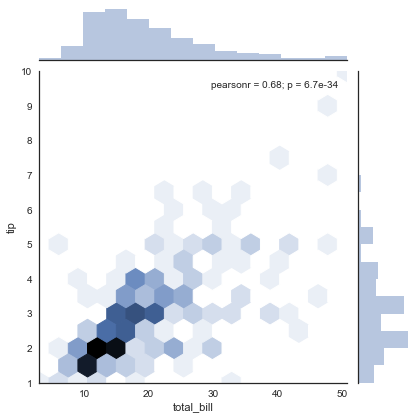

In [91]:
# 使用六角形代替点图图
g = sns.jointplot("total_bill", "tip", data=tips, kind="hex")

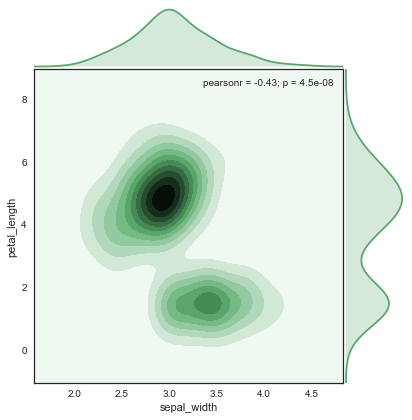

In [92]:
# 绘制核密度图
iris = sns.load_dataset("iris")
g = sns.jointplot("sepal_width", "petal_length", data=iris, 
                    kind="kde", space=0, color="g")

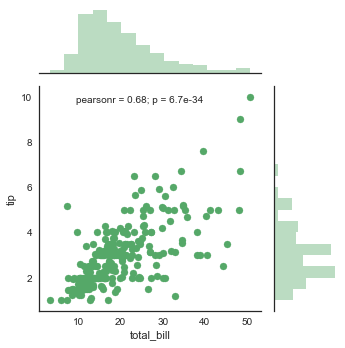

In [93]:
# 控制图形的大小和颜色
g = sns.jointplot("total_bill", "tip", data=tips, 
                    size=5, ratio=3, color="g")

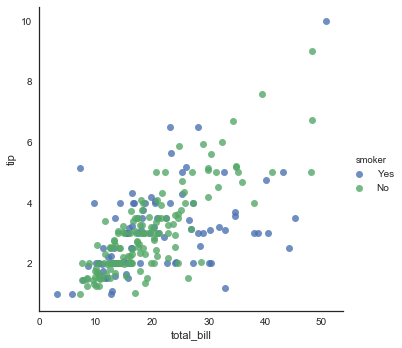

In [94]:
# 5.4.变量关系组图pairplot

# 就是绘制dataframe中各个变量两两之间的关系图。 
# 在变量关系图中，最常见的就是 x-y的线图，x-y的散点图，x-y的回归图。
# 其实这三者都可以通过lmplot绘制，只是控制不同的参数而已。x-y的线图，其实就是时间序列图，这里就不说了。 
# 这里又说一遍散点图，是为了和前面的因子变量散点图相区分，前面的因子变量散点图，
# 讲的是不同因子水平的值绘制的散点图，而这里是两个数值变量值散点图关系。
# 为什么要用lmplot呢，说白了就是，先将这些散点画出来，然后在根据散点的分布情况拟合出一条直线。
# 但是用lmplot总觉得不好，没有用scatter来得合适。
# x-y 的散点图，不画回归线，fit_reg=False

tips = sns.load_dataset("tips")
g = sns.lmplot(x="total_bill", y="tip", data=tips,
                fit_reg=False,hue='smoker',scatter=True)

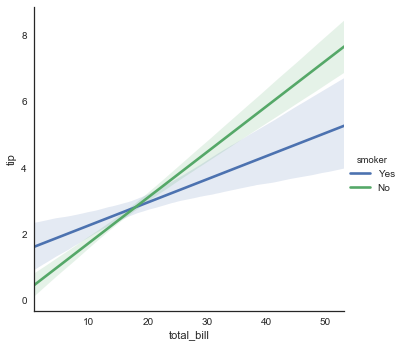

In [95]:
# 只画回归线，不画散点图，scatter=False
g = sns.lmplot(x="total_bill", y="tip", data=tips,
                fit_reg=True,hue='smoker',scatter=False)

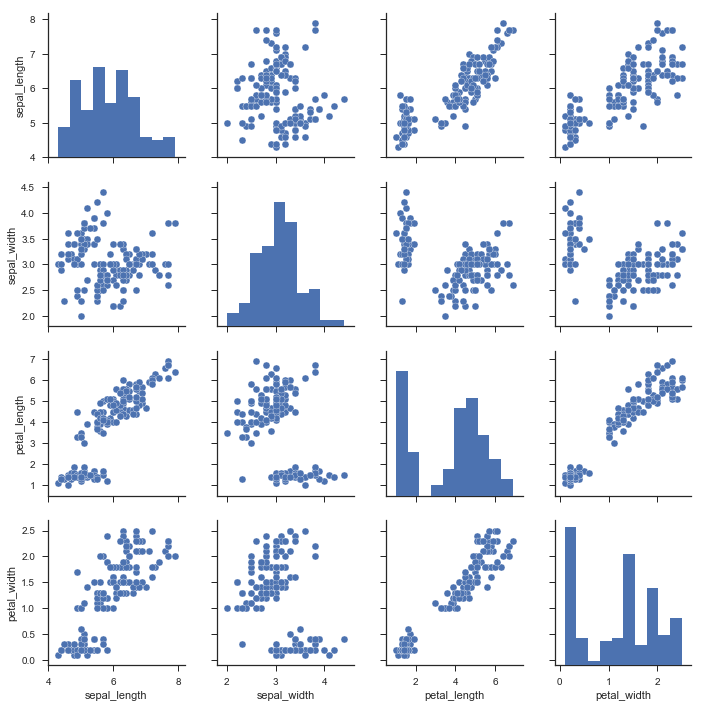

In [96]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

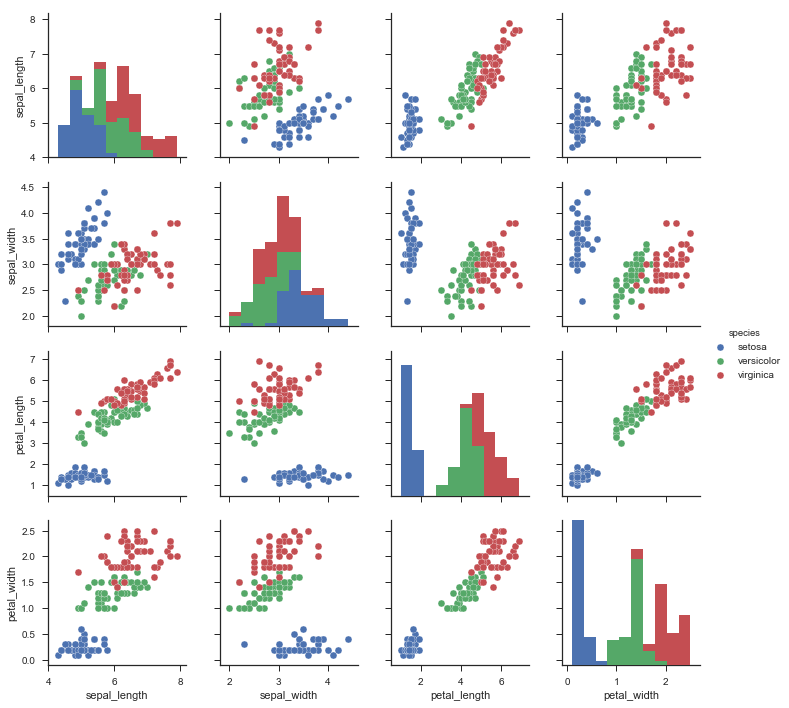

In [97]:
# 分组的变量关系图，似乎很厉害啊
g = sns.pairplot(iris, hue="species")

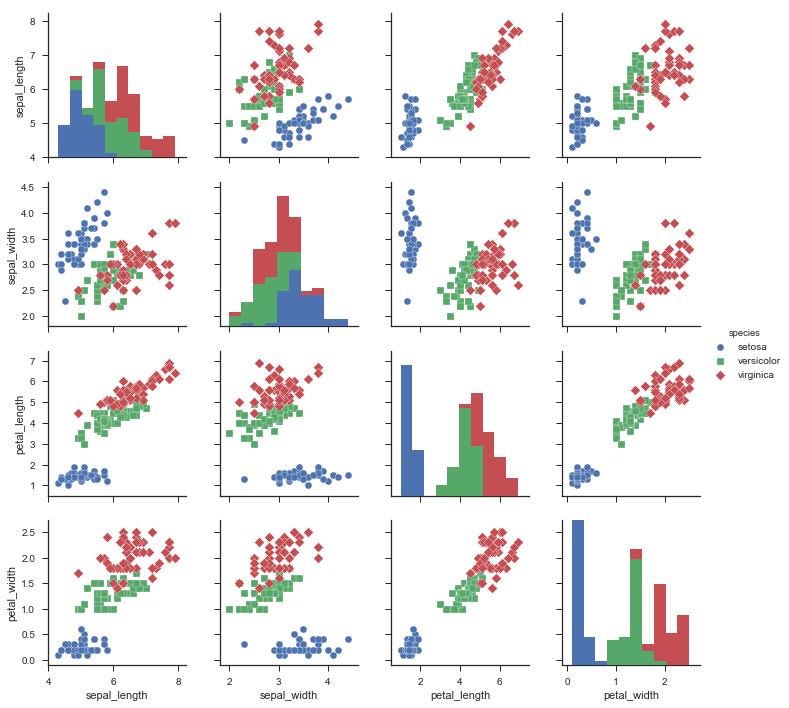

In [98]:
# hue 分组后，不同的组用不同的形状标记
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

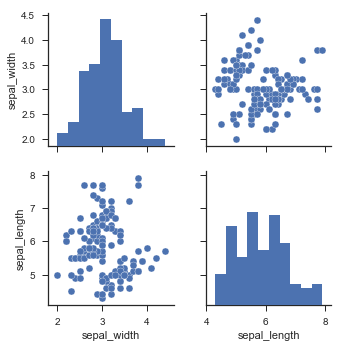

In [99]:
# 当然也可以只取dataframe中的一部分变量绘图
g = sns.pairplot(iris, vars=["sepal_width", "sepal_length"])

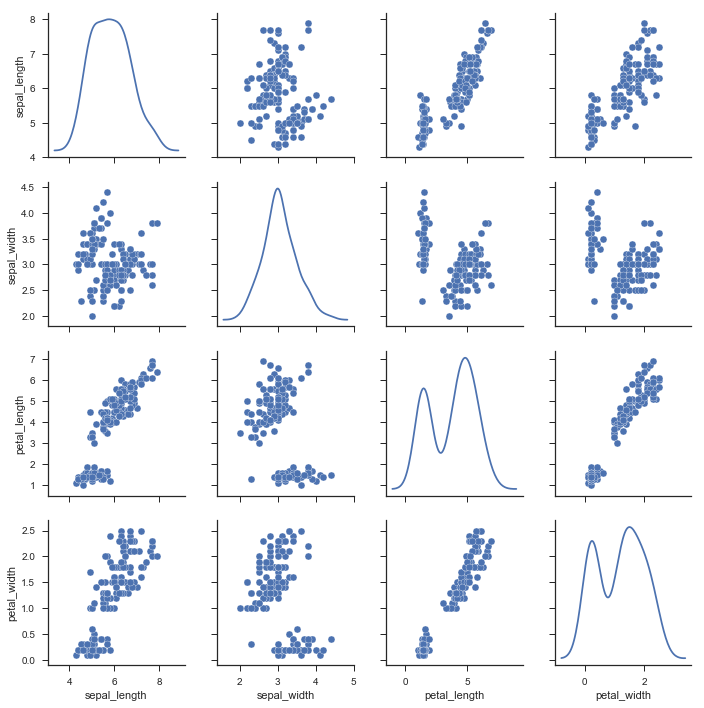

In [100]:
# 对角线默认绘制直方图，当然也可以绘制核密度图
g = sns.pairplot(iris, diag_kind="kde")
# 相应的，两变量关系图，也可以绘制线性回归图

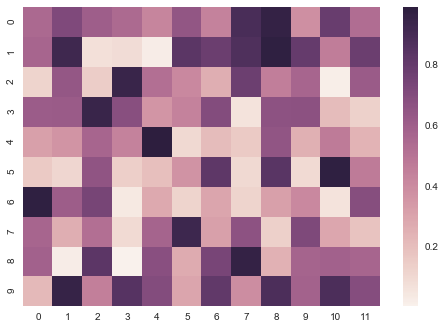

In [101]:
# 6.热力图

# 6.1.热力图heatmap
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

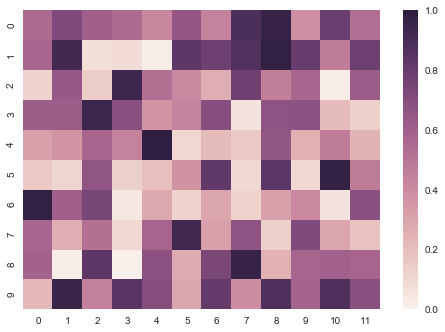

In [102]:
# 改变颜色映射的值范围
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)

In [105]:
# Plot a dataframe with meaningful row and column labels:
# 绘制x-y-z的热力图，比如 年-月-销量 的热力图
# flights = sns.load_dataset("flights")
# flights = flights.pivot("month", "year", "passengers")
# ax = sns.heatmap(flights)

In [107]:
# # 绘制热力图，还要将数值写到热力图上
# flights = sns.load_dataset("flights")
# ax = sns.heatmap(flights, annot=True, fmt="d")

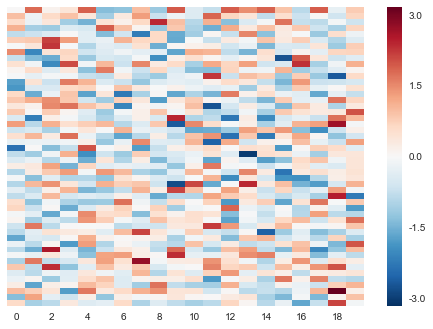

In [108]:
# 这个图在绘制缺失值分布有用，但是不知道怎么样。
# Plot every other column label and don’t plot row labels 
data = np.random.randn(50, 20)
ax = sns.heatmap(data, xticklabels=2, yticklabels=False)

In [ ]:
# 7.聚类图clustermap

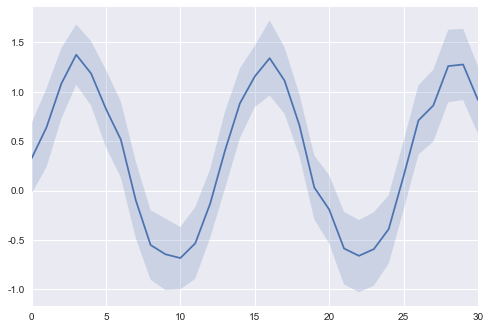

In [109]:
# 8.时间序列图
# tsplot函数说是绘制时间序列图，还不如说是绘制简单的线图更加合适吧，
# 因为我在绘制带timestap时间索引的pandas.Series时，并没有自动升采样绘图，
# 只是数据有有什么数据就画什么，这在时间序列上应该是不对的。

# 因为我遇到这样一种情况，一个产品只在上半年卖，从数据库中取出数据只有每年上半年的数据，
# 下半年没有数据也应该填充为0才对啊，但是seaborn的tsplot没有这个功能。

# 下面先介绍tsplot绘制线图吧，传入一个list或者series，直接绘制线图。
# 8.1.tsplot时序图
# Plot a trace with translucent confidence bands:
# 绘制带有半透明置信带的轨迹：
# data是多组list的组合，这时候应该绘制多条曲线才对啊，其实不是的，是多组list的均值的序列图（默认）
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
ax = sns.tsplot(data=data)

In [111]:
# tsplot的参数不太懂，直接上图吧
# gammas = sns.load_dataset("gammas")
# ax = sns.tsplot(time="timepoint", value="BOLD signal", 
#                 unit="subject", condition="ROI", data=gammas)

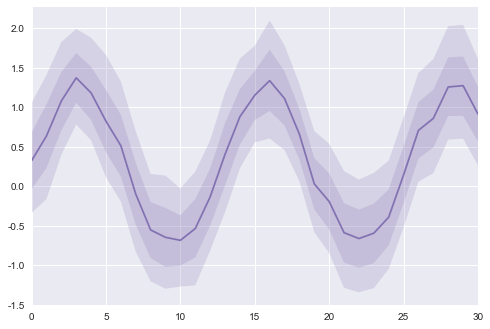

In [112]:
# 绘制不同的置信度拟合图，这个好用
ax = sns.tsplot(data=data, ci=[68, 95], color="m")

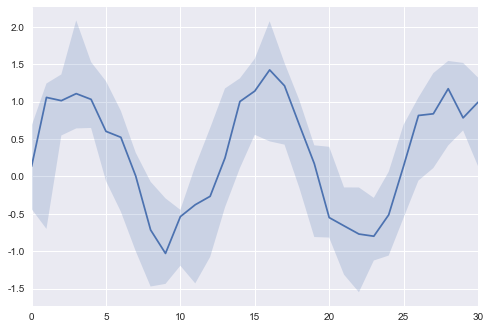

In [113]:
# 使用不同的统计函数，默认的是均值，这里是中位数
ax = sns.tsplot(data=data, estimator=np.median)

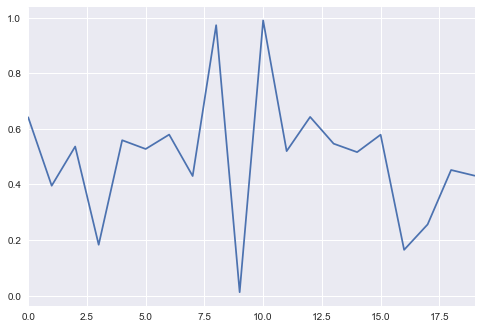

In [114]:
# 8.2.普通线图tsplot
data=np.random.random(20)
sns.tsplot(data)

In [115]:
# 8.3.采样的时序图

# 这里重点讲一下。如果时序中每天的数据都有还好说，如果没有，就需要采样了。
def plot_ts_day(x,y):
    """绘制每天的时间序列图。
    需要注意的是，序列是不是连续的，也就是说某天的数据是没有的,因此需要采样至每天都有记录，原来数据没有的就填充0
    x:时间轴，string或者time类型,是一个seires
    y:值
    """
    # x转成时间类型Timestamp，y也转成list
    x=[pd.to_datetime(str(i)) for i in x]
    y=[i for i in y]
    s=pd.Series(y,index=x)
    s = s.resample(rule='D',fill_method='ffill') # 生采样没有的会被填充
    # 原来没有的就填充为0
    s[s.index]=0
    s[x]=y
    # 重建索引，画出来的图好看点
    x2 = [i.strftime('%Y-%m-%d') for i in s.index]
    s.index = x2
    # 画图，这里使用series的plot函数，而不是seaborn.tsplot函数
    s.plot()